# Step-1 collecting data

In [5]:
##following code is for logistic regression
##Done by Swati Kahar

In [45]:
##importing required libraries
import os
import pandas as pd##importing pd for data analysis
import numpy as np##importing np for mathematical operations||scientific operations
import seaborn as sns##importing sns for statistical visualization
import matplotlib.pyplot as plt ## its imported for visualization


In [46]:

computer_data=pd.read_csv("C:\\Users\\dell\\Desktop\\Machine Learning\\Dataset for Machine Learning\\Computers.csv")
computer_data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


## Analysing the data

In [47]:
computer_data.shape##if we have n columns n^2 rows should be there for good model

(6259, 10)

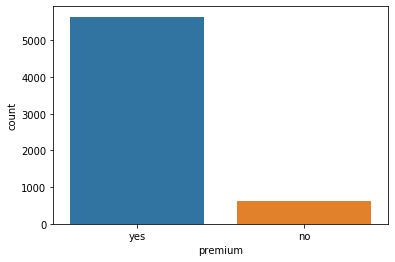

In [48]:
sns.countplot(x="premium",data=computer_data)##It is giving the frequency of premium

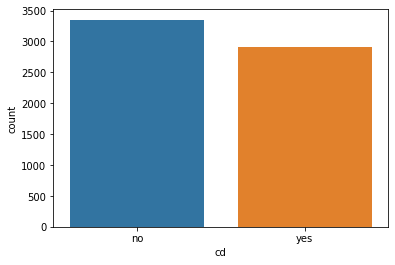

In [49]:
sns.countplot(x="cd",data=computer_data)

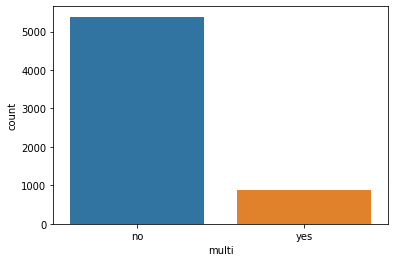

In [50]:
sns.countplot(x="multi",data=computer_data)

In [51]:
##How to deal with imbalance data in Edureka bcoz our premium column which is target is imbalance 
##for good model it should be 85 and 15 ratio
##for best it should be 60 and 40
##imputation technique also from Edureka


In [52]:
computer_data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F904C30F0>]],
      dtype=object)

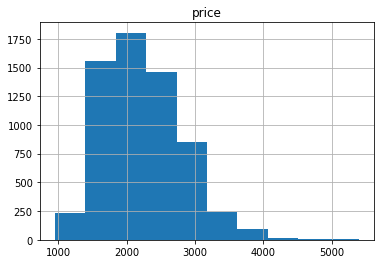

In [53]:
computer_data.hist("price")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F99053978>]],
      dtype=object)

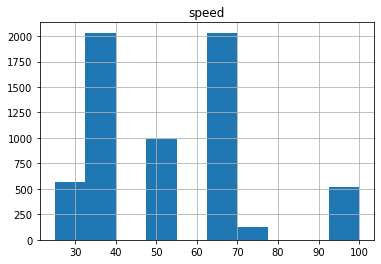

In [54]:
computer_data.hist("speed")##gap between unique values thats y graph is in discrete 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F99039CC0>]],
      dtype=object)

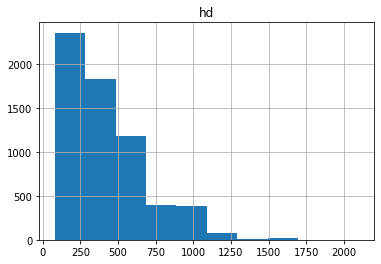

In [55]:
computer_data.hist("hd")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F98BB45C0>]],
      dtype=object)

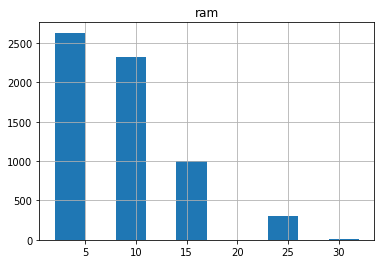

In [56]:
computer_data.hist("ram")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F9920E978>]],
      dtype=object)

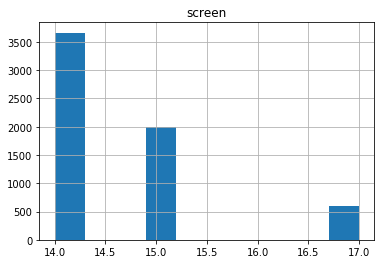

In [57]:
computer_data.hist("screen")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F990CF7B8>]],
      dtype=object)

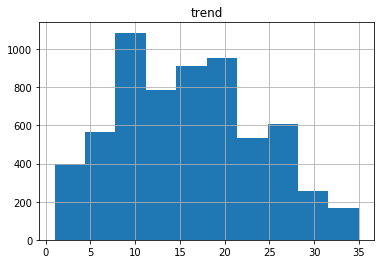

In [58]:
computer_data.hist("trend")

In [59]:
computer_data.isnull().sum()## calculation of null values

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

In [60]:
computer_data.dtypes

price       int64
speed       int64
hd          int64
ram         int64
screen      int64
cd         object
multi      object
premium    object
ads         int64
trend       int64
dtype: object

In [61]:
computer_data.premium.replace(("yes","no"),(1,0),inplace=True)

In [62]:
computer_data.dtypes

price       int64
speed       int64
hd          int64
ram         int64
screen      int64
cd         object
multi      object
premium     int64
ads         int64
trend       int64
dtype: object

In [63]:
computer_data.cd.replace(("yes","no"),(1,0),inplace=True)

In [64]:
computer_data.multi.replace(("yes","no"),(1,0),inplace=True)

In [65]:
computer_data.dtypes

price      int64
speed      int64
hd         int64
ram        int64
screen     int64
cd         int64
multi      int64
premium    int64
ads        int64
trend      int64
dtype: object

In [66]:
## Computing correlation it should be between -1 to 1
computer_data.corr(method="pearson")

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.197343,-0.016651,-0.080696,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,0.258260,0.084172,0.114208,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,0.503570,0.092805,0.196924,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,0.438504,0.045497,0.197145,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,0.129488,-0.001740,0.018745,-0.093919,0.188614
cd,0.197343,0.258260,0.503570,0.438504,0.129488,1.000000,0.432179,0.216077,-0.061091,0.445780
multi,-0.016651,0.084172,0.092805,0.045497,-0.001740,0.432179,1.000000,0.124775,-0.030394,0.210907
premium,-0.080696,0.114208,0.196924,0.197145,0.018745,0.216077,0.124775,1.000000,-0.152023,0.042107
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,-0.061091,-0.030394,-0.152023,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,0.445780,0.210907,0.042107,-0.318553,1.000000


In [67]:
x = computer_data.iloc[:,[0,1,2,3,5,6,8]]
x.head()

,price,speed,hd,ram,cd,multi,ads
0,1499,25,80,4,0,0,94
1,1795,33,85,2,0,0,94
2,1595,25,170,4,0,0,94
3,1849,25,170,8,0,0,94
4,3295,33,340,16,0,0,94


In [68]:
y=computer_data.iloc[:,[7]]

In [69]:
y.head()

,premium
0,1
1,1
2,1
3,0
4,1


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [72]:
log = LogisticRegression()
log.fit(x_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
pred=log.predict(x_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
pd.DataFrame(pred,columns=["predictions"])

,predictions
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[  37,  157],
       [   9, 1675]], dtype=int64)

In [77]:
accuracy_score(y_test,pred)

0.9116080937167199

In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.19      0.31       194
           1       0.91      0.99      0.95      1684

    accuracy                           0.91      1878
   macro avg       0.86      0.59      0.63      1878
weighted avg       0.90      0.91      0.89      1878

